In [2]:
 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Any results you write to the current directory are saved as output.

In [3]:
df = pd.read_csv('supermarket_sales.csv')

In [4]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

By inspection, the 'Date' datatype is an object, we need to change it to datetime

In [6]:
df['date'] = pd.to_datetime(df['Date'])


In [7]:
df['date'].dtype

dtype('<M8[ns]')

In [8]:
type(df['date'])

pandas.core.series.Series

In [9]:
df['date'] = pd.to_datetime(df['date'])

In [10]:
df['day'] = (df['date']).dt.day
df['month'] = (df['date']).dt.month
df['year'] = (df['date']).dt.year

In [11]:
df['Time'] = pd.to_datetime(df['Time'])

In [12]:
  df['Hour'] = (df['Time']).dt.hour    #type(df['Time'])

Let's see the unique hours of sales in this dataset

In [13]:
df['Hour'].nunique()  #gives us the number of unique hours 

11

In [14]:
  df['Hour'].unique()

array([13, 10, 20, 18, 14, 11, 17, 16, 19, 15, 12], dtype=int64)

In [15]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,day,month,year,Hour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000.000000,1000.000000,1000.0,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270,15.256000,1.993000,2019.0,14.910000
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858,8.693563,0.835254,0.0,3.186857
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000,1.000000,1.000000,2019.0,10.000000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000,8.000000,1.000000,2019.0,12.000000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000,15.000000,2.000000,2019.0,15.000000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000,23.000000,3.000000,2019.0,18.000000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000,31.000000,3.000000,2019.0,20.000000


 ### Let's find the number of unique values in columns with object datatype

In [16]:
categorical_columns = [cname for cname in df.columns if df[cname].dtype == "object"]

In [17]:
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Date',
 'Payment']

In [18]:
print("# unique values in Branch: {0}".format(len(df['Branch'].unique().tolist())))
print("# unique values in City: {0}".format(len(df['City'].unique().tolist())))
print("# unique values in Customer Type: {0}".format(len(df['Customer type'].unique().tolist())))
print("# unique values in Gender: {0}".format(len(df['Gender'].unique().tolist())))
print("# unique values in Product Line: {0}".format(len(df['Product line'].unique().tolist())))
print("# unique values in Payment: {0}".format(len(df['Payment'].unique().tolist())))

# unique values in Branch: 3
# unique values in City: 3
# unique values in Customer Type: 2
# unique values in Gender: 2
# unique values in Product Line: 6
# unique values in Payment: 3


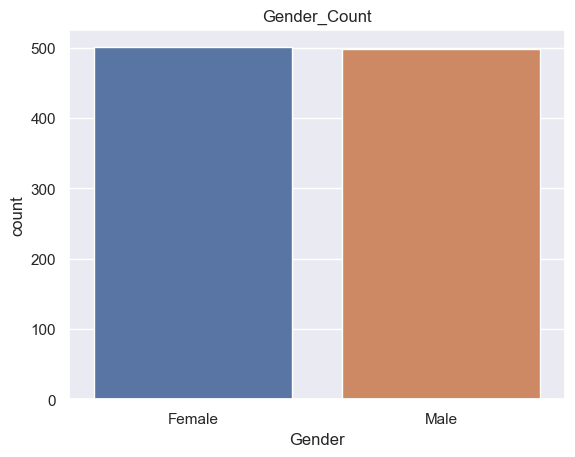

In [20]:
sns.set(style="darkgrid")       #style the plot background to become a grid
genderCount  = sns.countplot(x="Gender", data =df).set_title("Gender_Count")



Text(0.5, 1.0, 'Ratings by Branch')

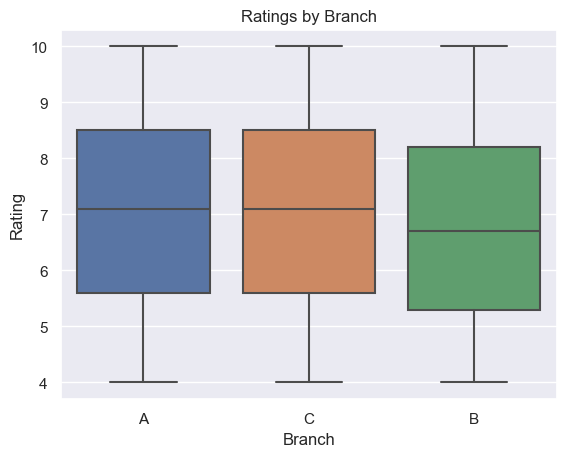

In [21]:
 sns.boxplot(x="Branch", y = "Rating" ,data =df).set_title("Ratings by Branch") 

Branch B has the lowest rating among all the branches

*Sales by the hour in the comapny* Most of the item were sold around 14:00 hrs local time

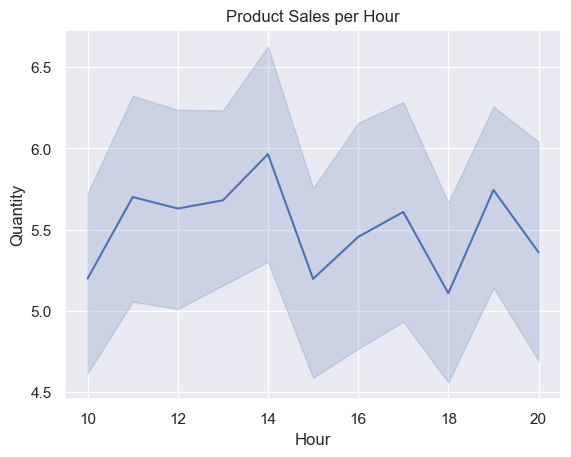

In [22]:
genderCount  = sns.lineplot(x="Hour",  y = 'Quantity',data =df).set_title("Product Sales per Hour")

Below we can see how each branch's sales quantity looks like by the hour in a monthly fashion 

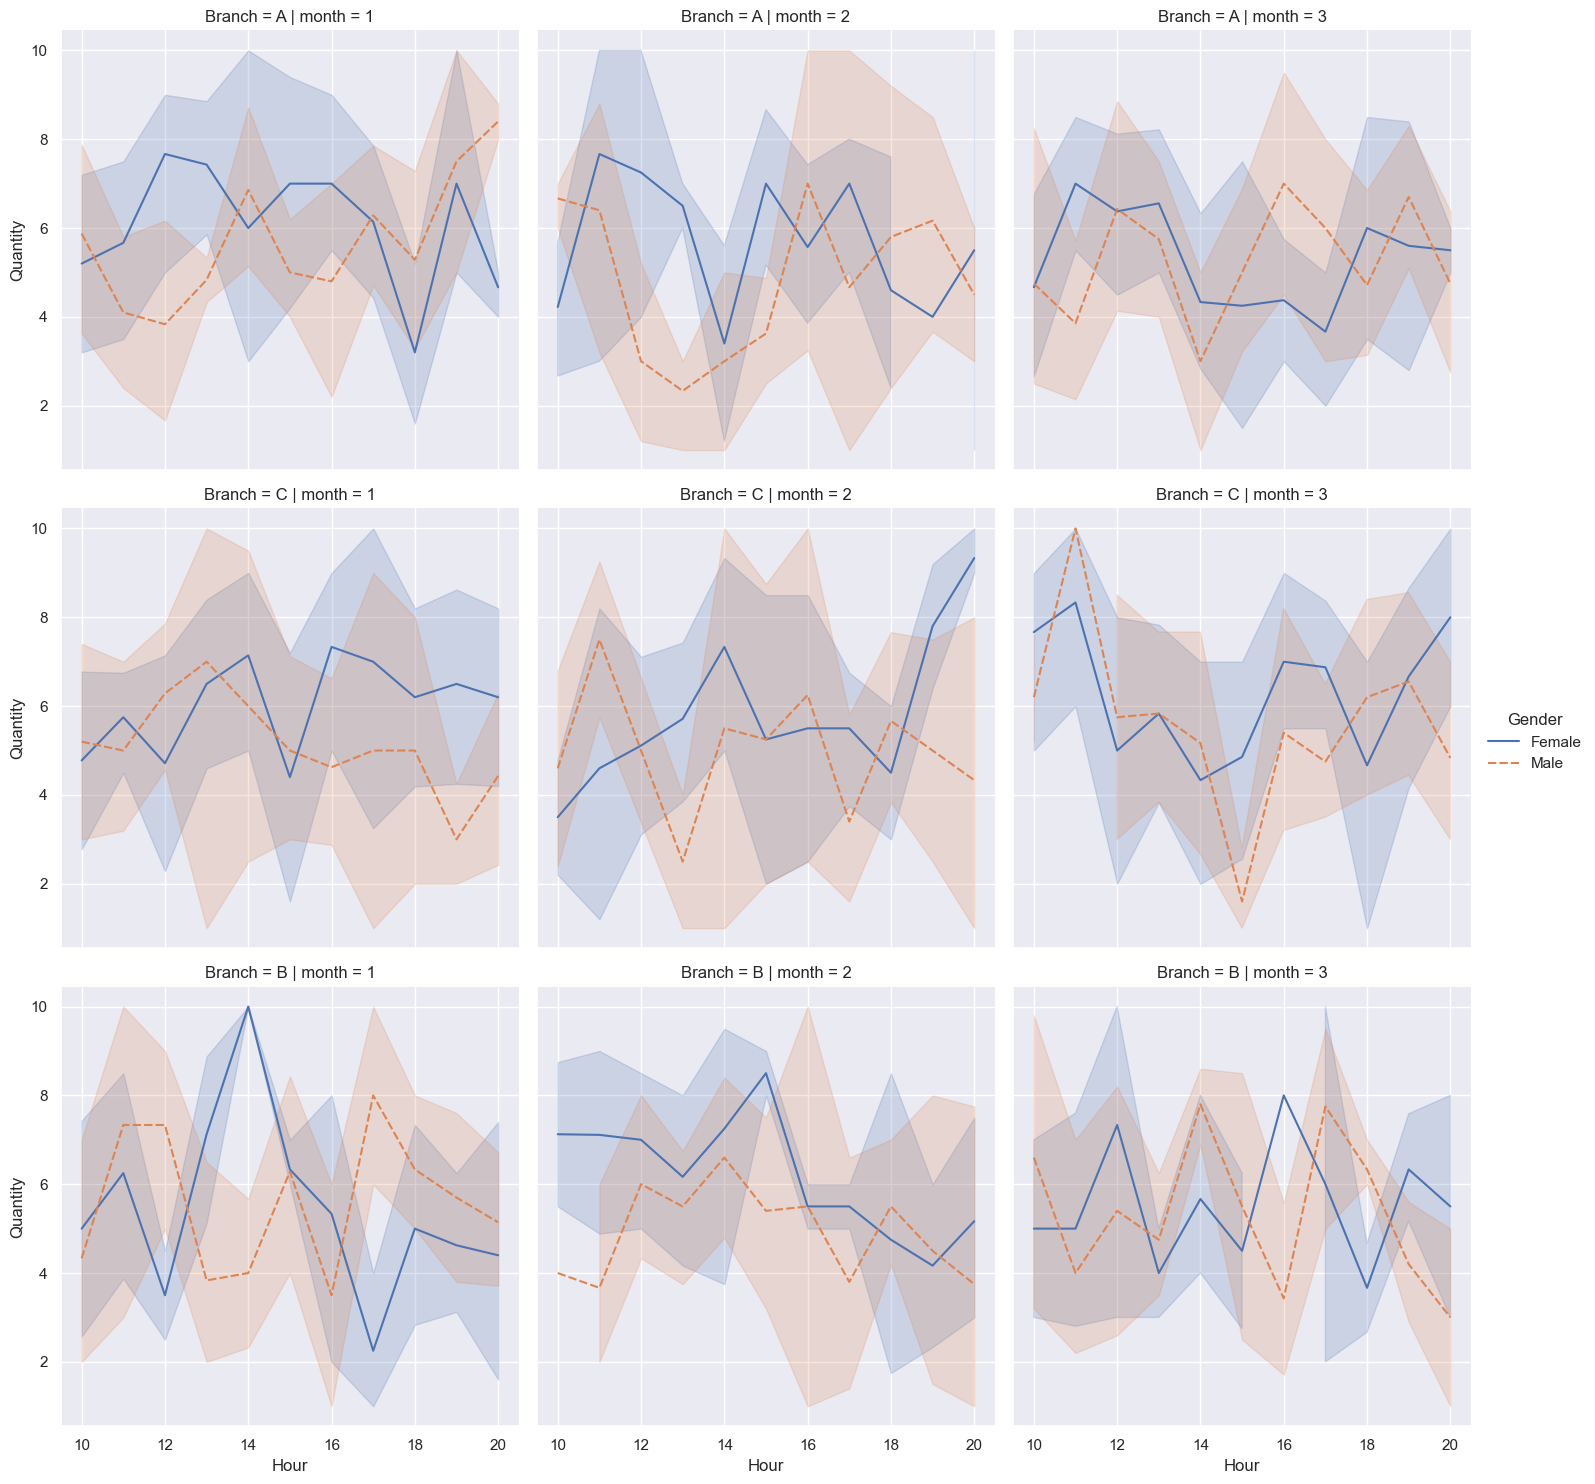

In [23]:
genderCount  = sns.relplot(x="Hour",  y = 'Quantity', col= 'month' , row= 'Branch', kind="line", hue="Gender", style="Gender", data =df)

 Below we can see each branch's sales by the hour in a monthly fashion 

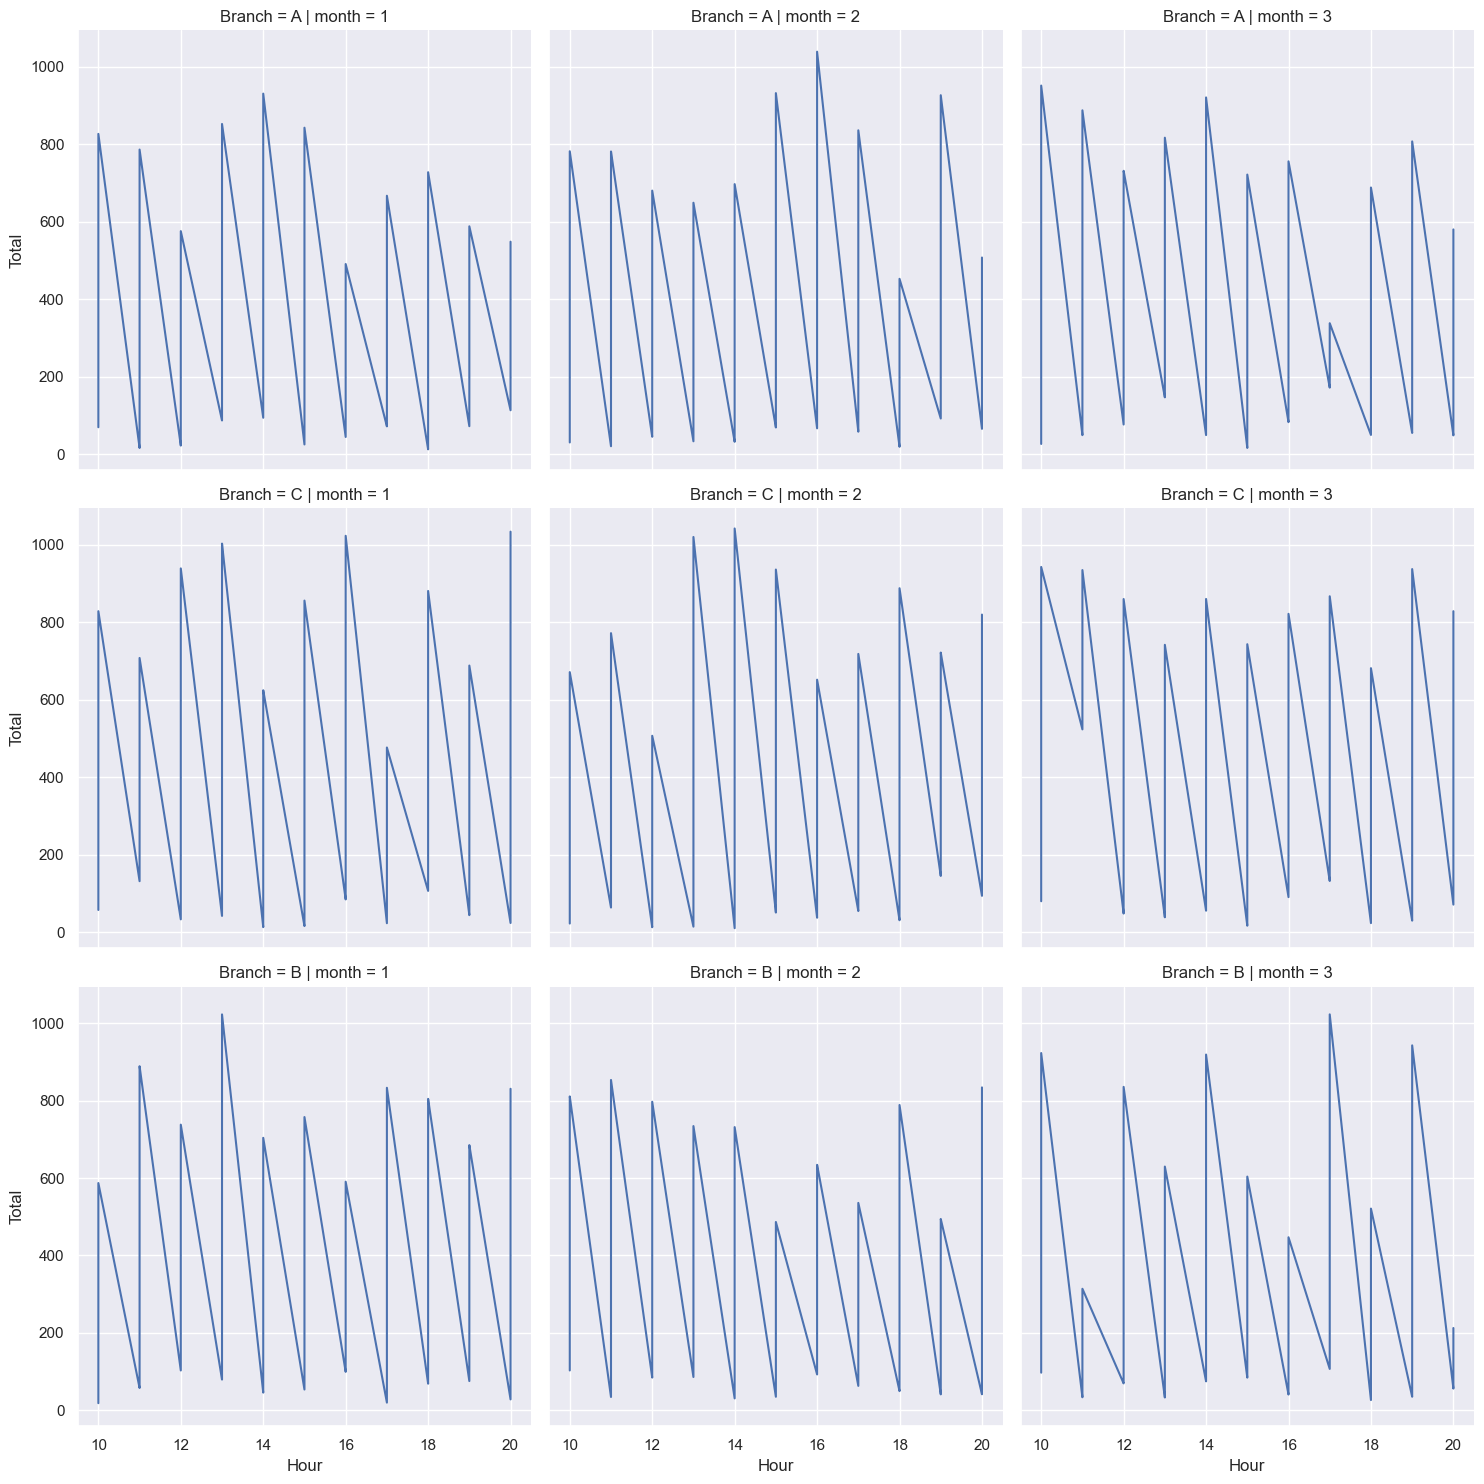

In [24]:
genderCount  = sns.relplot(x="Hour",  y = 'Total', col= 'month' , row= 'Branch', estimator = None, kind="line", data =df)

In [25]:
df['Rating'].unique()

array([ 9.1,  9.6,  7.4,  8.4,  5.3,  4.1,  5.8,  8. ,  7.2,  5.9,  4.5,
        6.8,  7.1,  8.2,  5.7,  4.6,  6.9,  8.6,  4.4,  4.8,  5.1,  9.9,
        6. ,  8.5,  6.7,  7.7,  7.5,  7. ,  4.7,  7.6,  7.9,  6.3,  5.6,
        9.5,  8.1,  6.5,  6.1,  6.6,  5.4,  9.3, 10. ,  6.4,  4.3,  4. ,
        8.7,  9.4,  5.5,  8.3,  7.3,  4.9,  4.2,  9.2,  7.8,  5.2,  9. ,
        8.8,  6.2,  9.8,  9.7,  5. ,  8.9])

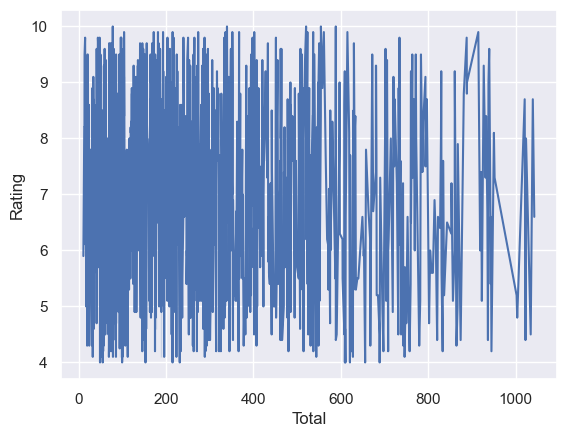

In [26]:
ageDisSpend = sns.lineplot(x="Total", y = "Rating", data =df)

## Product Analysis

Let's look at the various products' performance.

<Axes: xlabel='Quantity', ylabel='Product line'>

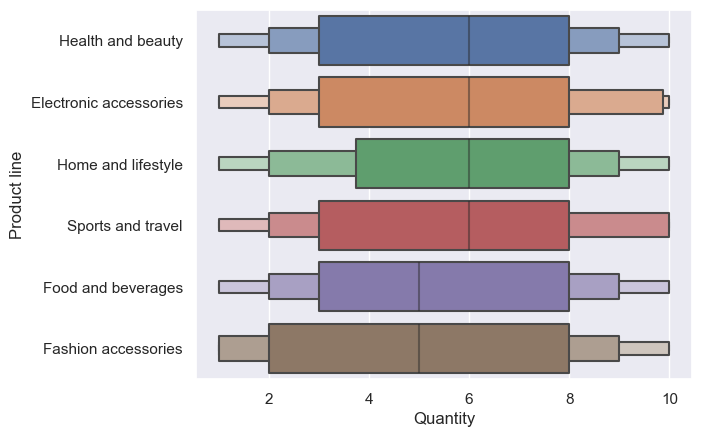

In [27]:
sns.boxenplot(y = 'Product line', x = 'Quantity', data=df )

From the above visual, Health and Beauty,Electronic accessories, Homem and lifestyle, Sports and travel have a better average quantity sales that food and beverages as well as Fashion accessories. 

<Axes: xlabel='count', ylabel='Product line'>

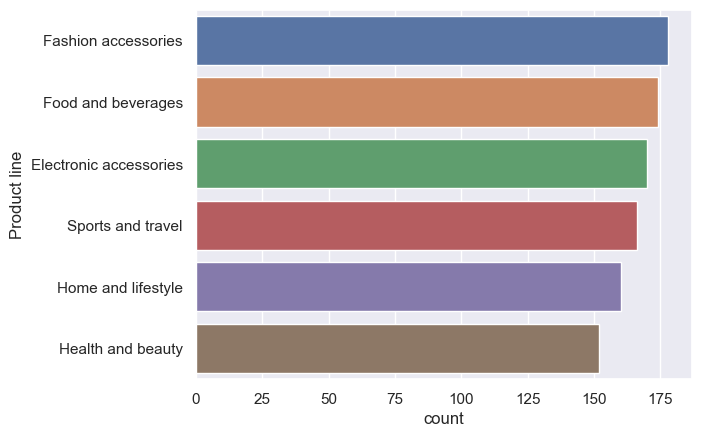

In [29]:
sns.countplot(y = 'Product line', data=df, order = df['Product line'].value_counts().index )

From the above image shows the top product line item type sold in the given dataset. Fashion Accessories is the highest while Health and beauty is the lowest

<Axes: xlabel='Total', ylabel='Product line'>

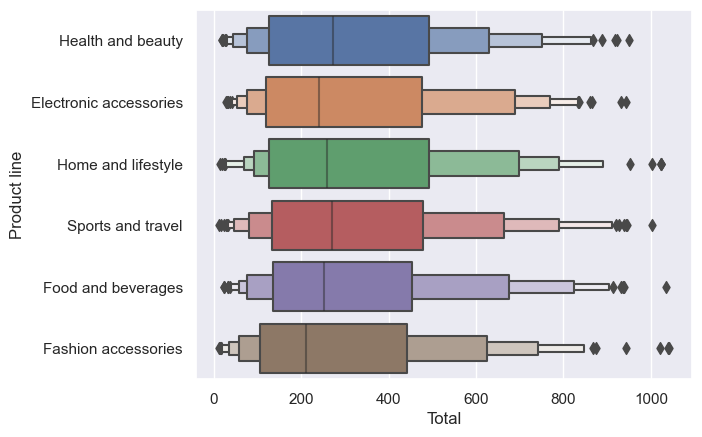

In [30]:
sns.boxenplot(y = 'Product line', x = 'Total', data=df )

<Axes: xlabel='Total', ylabel='Product line'>

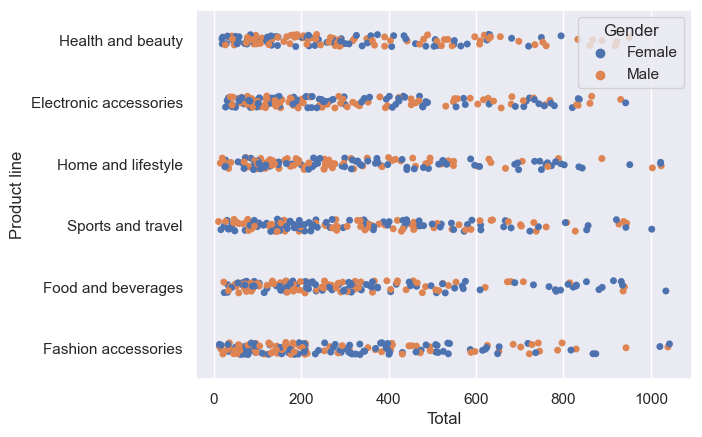

In [31]:
sns.stripplot(y = 'Product line', x = 'Total', hue = 'Gender', data=df )

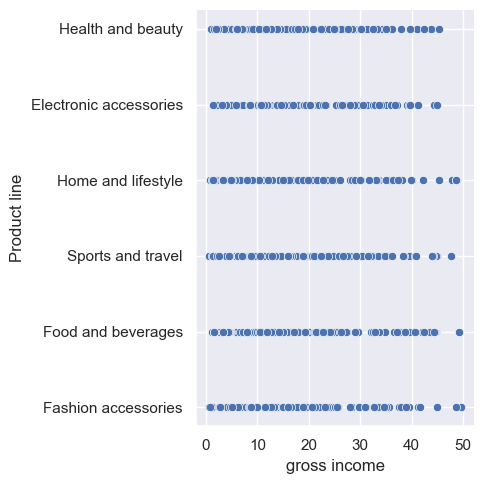

In [32]:
sns.relplot(y = 'Product line', x = 'gross income', data=df )

<Axes: xlabel='Rating', ylabel='Product line'>

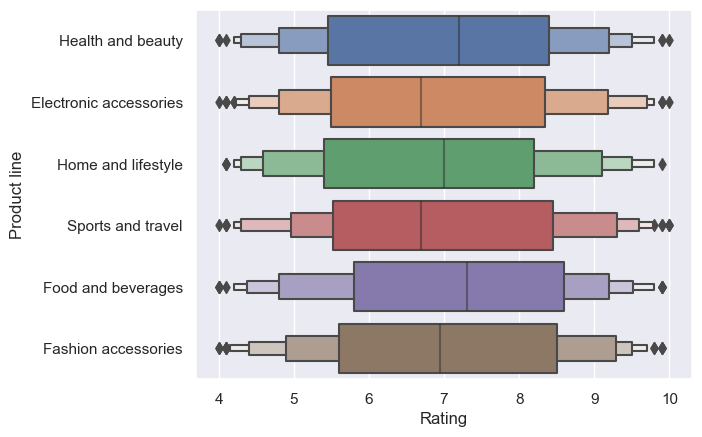

In [33]:
sns.boxenplot(y = 'Product line', x = 'Rating', data=df )

Food and Beverages have the highest average rating while sports and travel the lowest

Let's see when customers buy certain products in the various branches. 

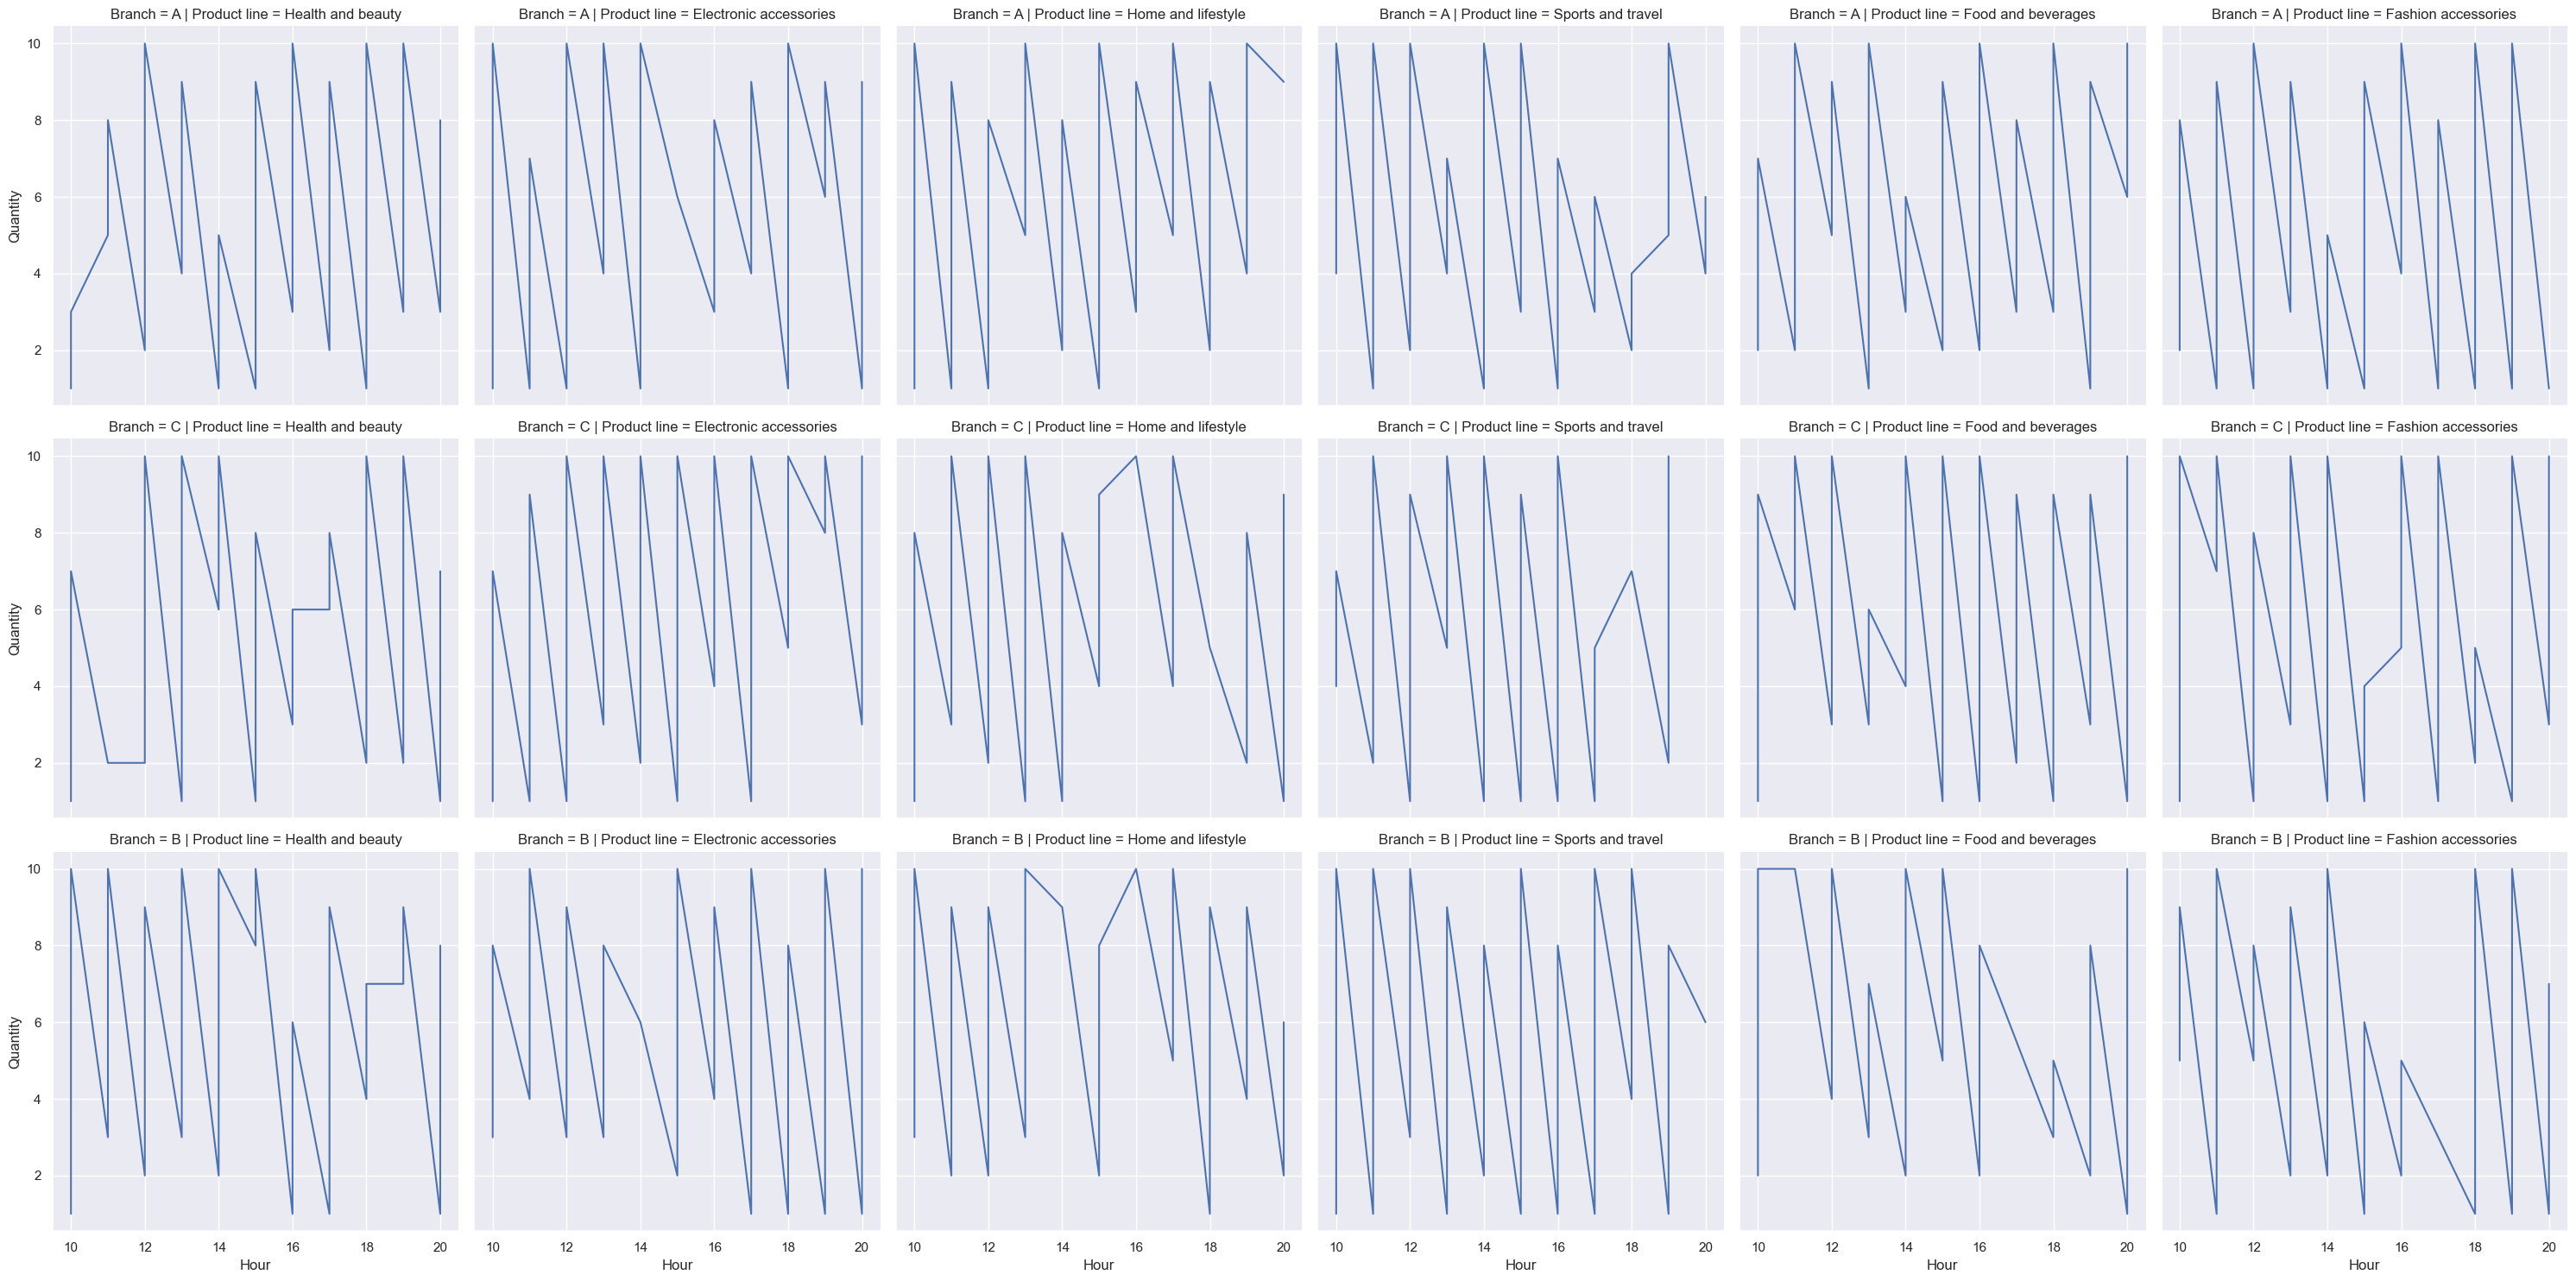

In [34]:
productCount  = sns.relplot(x="Hour",  y = 'Quantity', col= 'Product line' , row= 'Branch', estimator = None, kind="line", data =df)

From the above plots, we can see that food and beverages sales usually high in all three branches at evening especially around 19:00 

# Payment Channel

Let see how customers make payment in this business

Text(0.5, 1.0, 'Payment Channel')

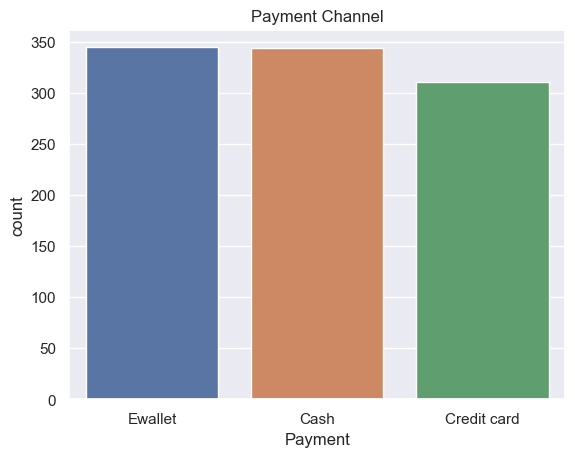

In [35]:
 sns.countplot(x="Payment", data =df).set_title("Payment Channel") 

Most of the customers pay through the Ewallet and Cash Payment while under 40 percent of them pay with their credit card. We would also like to see this payment type distribution across all the branches

Text(0.5, 1.0, 'Payment Channel by Branch')

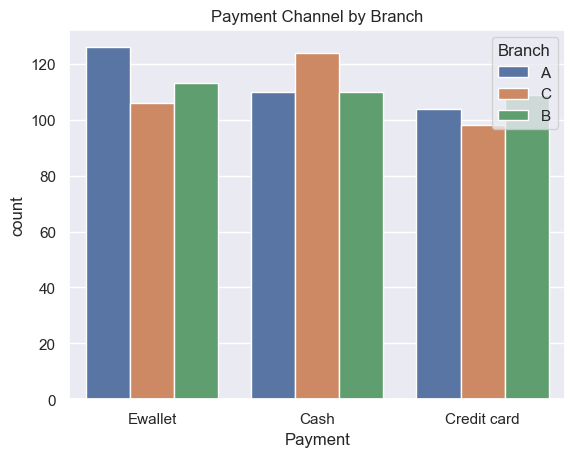

In [36]:
 sns.countplot(x="Payment", hue = "Branch", data =df).set_title("Payment Channel by Branch") 

# Customer Analysis

From inspection, there are two types of customers. Members and Normal. Let's see how many they are and where they are 

In [37]:
df['Customer type'].nunique()

2

Text(0.5, 1.0, 'Customer Type')

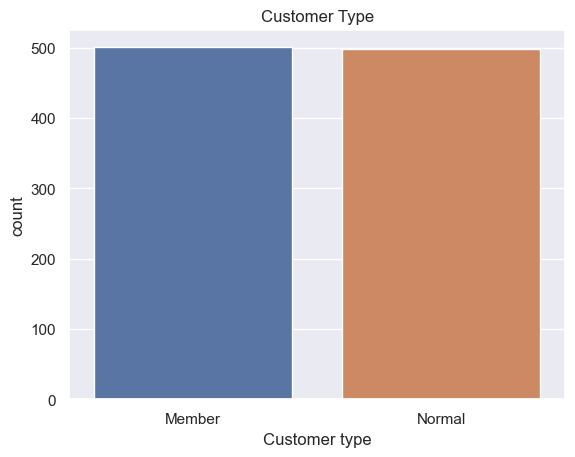

In [38]:
 sns.countplot(x="Customer type", data =df).set_title("Customer Type") 

Text(0.5, 1.0, 'Customer Type by Branch')

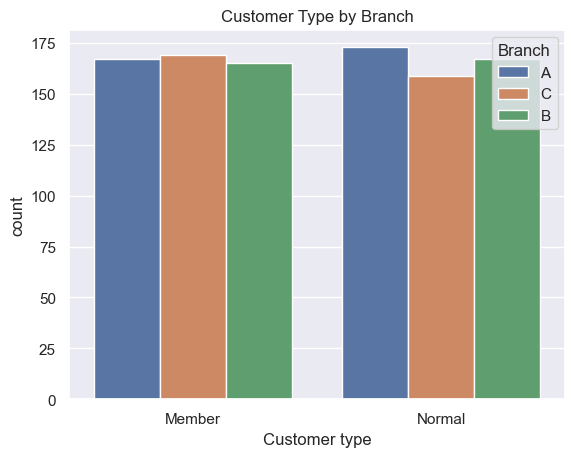

In [39]:
 sns.countplot(x="Customer type", hue = "Branch", data =df).set_title("Customer Type by Branch") 

## Does customer type influences the sales 

In [40]:
df.groupby(['Customer type']).agg({'Total': 'sum'})

,Total
Customer type,
Member,164223.444
Normal,158743.305


<Axes: xlabel='Customer type', ylabel='Total'>

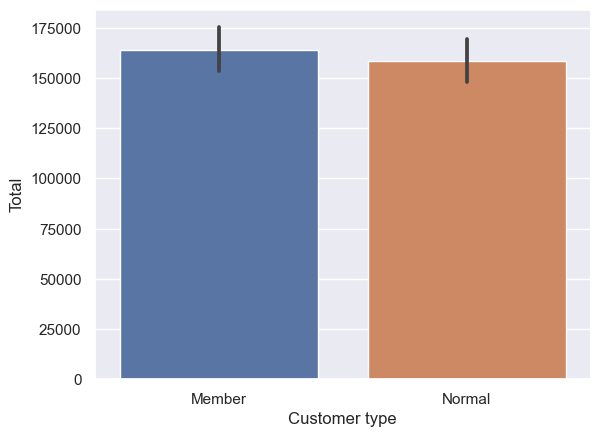

In [41]:
sns.barplot(x="Customer type", y="Total", estimator = sum, data=df)

Do the customer type influence customer rating? Let's find out 

Text(0.5, 1.0, 'Customer Type')

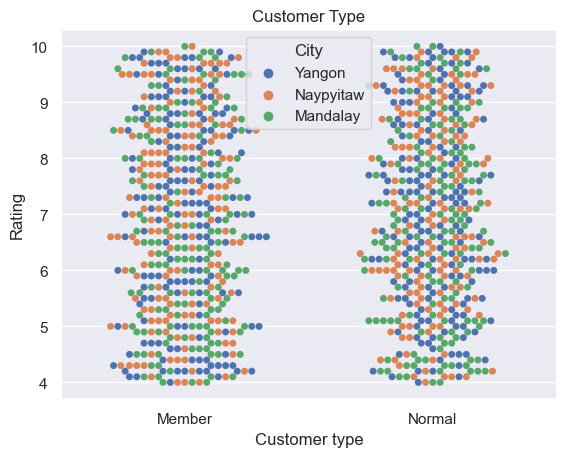

In [42]:
 sns.swarmplot(x="Customer type",  y = "Rating",  hue = "City", data =df).set_title("Customer Type") 

With the use of google search, I was able to get the longitude and latitude of each cities. We can 

In [43]:
long = {"Yangon": 16.8661, "Naypyitaw": 19.7633, "Mandalay": 21.9588 }
lat = {"Yangon": 96.1951, "Naypyitaw": 96.0785, "Mandalay": 96.0891 }
for set in df:
    df['long'] = df['City'].map(long)
    df['lat'] = df['City'].map(lat)

Text(0.5, 1.0, 'Customer Type')

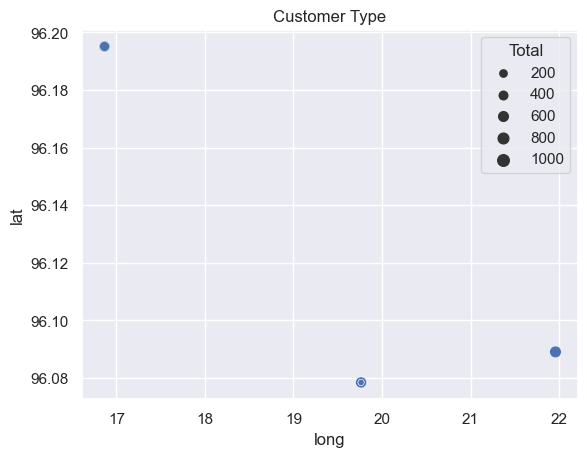

In [44]:
 sns.scatterplot(x="long",  y = "lat",size = "Total", data =df, legend = "brief").set_title("Customer Type") 

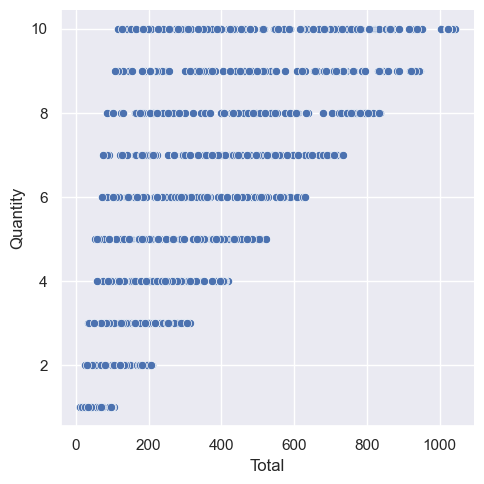

In [45]:
 sns.relplot(x="Total",  y = "Quantity", data =df)